Перший погляд на дані

In [4]:
import numpy as np
import pandas as pd
import nltk
import re
import random
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from ukrainian_stemmer import UkrainianStemmer
from data_print import data_class_display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)   

land_data=pd.read_csv('land_real_estate.csv').replace(np.nan, "")
land_data['text']=land_data['description']+' '+land_data['land_types_source']+' '+land_data['land_types_PcmU']
def land_types_download():    
    data=pd.read_csv('land_types.csv')
    data=data[['id','land_types']]
    data=data.set_index('id')
    data=data.T
    data=data.to_dict('records')
    return (data[0])

land_types=land_types_download()
built_up={0:'Не забудована',1:'Забудована'}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
print ('Типи земельних ділянок:')
land_types

Типи земельних ділянок:


{1: 'ОЖБ',
 2: 'ОСГ',
 3: 'Cадова',
 4: 'Комерційна',
 5: 'Багатоповерхова',
 6: 'Товарна',
 7: 'ОЖБ та ОСГ'}

In [5]:
print ('Забудованість:')
built_up

Забудованість:


{0: 'Не забудована', 1: 'Забудована'}

In [12]:
print ('Кількість помічених оглошень: {} екземплярів'.format(land_data.shape[0]))
print ('Перших 10 оголошень:')
land_data.head(10)

Кількість помічених оглошень: 4256 екземплярів
Перших 10 оголошень:


,land_types_source,land_types_PcmU,description,built_up,land_types,land_squer
0,комерційного,,,0,4,5000
1,під забудову,,,0,1,1200
2,садівництво,,,0,3,470
3,сільськогосподарського,,,0,2,10000
4,,,земельних ділянок с пустомитівський р н км від львова є земельна ділянка сот приватизованої є старенький будиночок з виведеним газом та світлом вода біля будинку є кадастровий номер та ще сот в користуванні в центрі села торг,1,1,1300
5,під забудову,,увага дуже терміново сот вислобокихороше розташування поряд обжитий район поряд луцька трассаодразу за рестораном семільйонпо за соткукомунікації порядідеально під котеджі за усе,0,1,2100
6,під забудову,,за давидовом земельна ділянка розміром м прямокутної форми рівна зручний асфальтовий доїзд комунікації світло і газ поруч з ділянкою неподалік від ділянки ліс і ставок,0,1,1000
7,,,зем діл вул шевченка кінець вулиці сот приватиз вздовж лісу метрів на ділянці також дерева вигляд на озеро біля ділянки світло і газ поруч збудований буд вже освітлюється у вечері вулиця розбудований р можна докупити діл поруч уо торг,0,1,1300
8,,для будівництва і обслуговування житлового будинку господарських будівель і споруд присадибна ділянка для будівництва і обслуговування житлового будинку господарських будівель і споруд присадибна ділянка,га кадастровий номер га кадастровий номер м ужгород вул запорізька,0,1,1200
9,ділянка під житлову забудову,для ведення особистого селянського господарства для ведення особистого селянського господарства для ведення особистого селянського господарства,га для ведення особистого селянського господарства біля річки в двадцяти метрах лісу та рибних ставків розкажу детально по телефону кадастровий номер можлива оренда,0,2,102


Розподіл вибірки за типами земельних ділянок

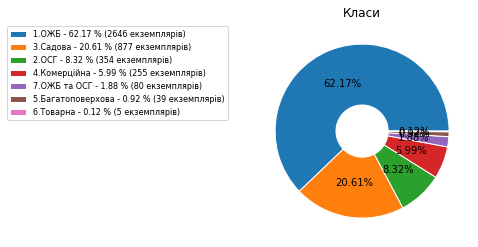

In [9]:
data_class_display(dataframe=land_data,class_column='land_types',expl_lables=land_types)


Розподіл вибірки за забудованістю земельних ділянок

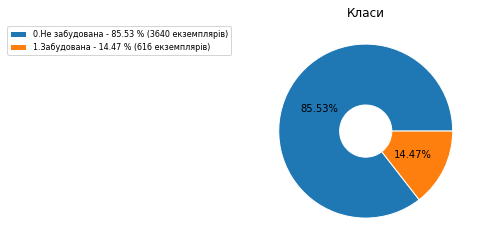

In [10]:
data_class_display(dataframe=land_data,class_column='built_up',expl_lables=built_up)

Токенізатор та функція ngrams_info

1 - grams
ua_stemmer: True
Кількість символів:  1100031
Кількість токенів:  151318
Кількість унікальних токенів:  6638
Найбільш уживані токени:  [(('ділянк',), 6916), (('під',), 3472), (('і',), 3248), (('для',), 3032), (('будівництв',), 2584), (('на',), 2532), (('в',), 2458), (('будинк',), 2336), (('забудов',), 2310), (('земельн',), 2205), (('житлов',), 2034), (('поруч',), 1620), (('обслуговуванн',), 1614), (('та',), 1580), (('м',), 1532), (('комунікаці',), 1428), (('сот',), 1416), (('є',), 1406), (('с',), 1397), (('від',), 1362)]


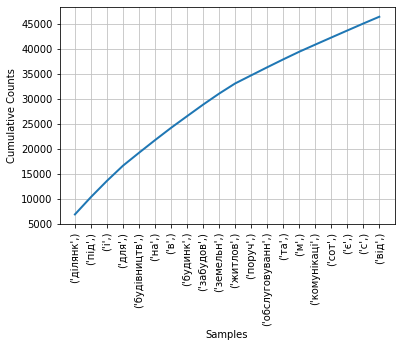

3 - grams
ua_stemmer: True
Кількість символів:  1100031
Кількість токенів:  151316
Кількість унікальних токенів:  70599
Найбільш уживані токени:  [(('обслуговуванн', 'житлов', 'будинк'), 1447), (('будівництв', 'і', 'обслуговуванн'), 1278), (('і', 'обслуговуванн', 'житлов'), 1240), (('для', 'будівництв', 'і'), 1205), (('будинк', 'господарськ', 'будівел'), 1186), (('будівел', 'і', 'споруд'), 1185), (('господарськ', 'будівел', 'і'), 1174), (('житлов', 'будинк', 'господарськ'), 1167), (('споруд', 'присадибн', 'ділянк'), 1079), (('і', 'споруд', 'присадибн'), 1075), (('продаж', 'земельн', 'ділянк'), 485), (('продаєт', 'земельн', 'ділянк'), 374), (('веденн', 'особист', 'селянськ'), 329), (('особист', 'селянськ', 'господарств'), 326), (('для', 'веденн', 'особист'), 310), (('земельн', 'ділянк', 'в'), 300), (('під', 'забудов', 'продаж'), 300), (('для', 'індивідуальн', 'садівництв'), 281), (('земельн', 'ділянк', 'під'), 260), (('будівництв', 'та', 'обслуговуванн'), 258)]


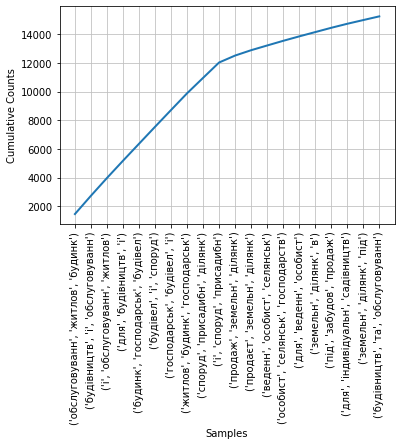

In [6]:
def ua_tokenizer(text,ua_stemmer=True,stop_words=[]):
    """ Tokenizer for Ukrainian language, returns only alphabetic tokens. 
    
    Keyword arguments:
    text -- text for tokenize 
    ua_stemmer -- if True use UkrainianStemmer for stemming words (default True)
    stop_words -- list of stop words (default [])
        
    """
    tokenized_list=[]
    text=re.sub(r"""['’"`�]""", '', text)
    text=re.sub(r"""([0-9])([\u0400-\u04FF]|[A-z])""", r"\1 \2", text)
    text=re.sub(r"""([\u0400-\u04FF]|[A-z])([0-9])""", r"\1 \2", text)
    text=re.sub(r"""[\-.,:+*/_]""", ' ', text)
    for word in nltk.word_tokenize(text): 
        if word.isalpha():
            word=word.lower() 
            if ua_stemmer is True:      
                word=UkrainianStemmer(word).stem_word()
            if word not in stop_words:
                tokenized_list.append(word) 
    return tokenized_list



def ngrams_info(series,n=1,most_common=20,ua_stemmer=True,stop_words=[]):
    """ ngrams_info - Show detailed information about string pandas.Series column. 
    
    Keyword arguments:
    series -- pandas.Series object
    most_common -- show most common words(default 50)
    ua_stemmer -- if True use UkrainianStemmer for stemming words (default True)
    stop_words -- list of stop words (default [])
        
    """
    print (n,'- grams')
    print ('ua_stemmer:',ua_stemmer)
    words=series.str.cat(sep=' ')
    print ('Кількість символів: ',len(words))
    words=nltk.ngrams(ua_tokenizer(words,ua_stemmer=ua_stemmer,stop_words=stop_words),n)
    words=nltk.FreqDist(words)
    print ('Кількість токенів: ',words.N())
    print ('Кількість унікальних токенів: ',words.B())
    print ('Найбільш уживані токени: ',words.most_common(most_common))
    words.plot (most_common, cumulative = True)
for n in (1,3):    
    ngrams_info(land_data['text'],n=n)

    


Реалізація моделі мішка слів

In [8]:

def bag_of_words(document_tokens,word_features):
        """ Return the dict of bag_of_words. 

        Keyword arguments:
        document_tokens -- list of tokens
        word_features -- list of features

        """
        
        features={}
        for word in word_features:
            
            features['contains({})'.format(word)]=(word[0] in document_tokens)
        
        return features


def nltk_classifiers(dataframe,X_column,y_column,classifier=nltk.NaiveBayesClassifier,n=1,stop_words=[],ua_stemmer=True,most_common=1000): 
    
    
    
    words=dataframe[X_column].str.cat(sep=' ')
    words=nltk.ngrams(ua_tokenizer(words,ua_stemmer=ua_stemmer,stop_words=stop_words),n=n)
    words=nltk.FreqDist(words)
    word_features=words.most_common(most_common)
    word_features=[words[0] for words in word_features]
    
    
    labeled_featuresets=[]
    for _,row in dataframe.iterrows():
        
        row[X_column]=nltk.ngrams(ua_tokenizer(row[X_column],ua_stemmer=ua_stemmer,stop_words=stop_words),n=n)
        row[X_column]=[words[0] for words in nltk.FreqDist(row[X_column])]        
        labeled_featuresets.append((bag_of_words(row[X_column],word_features=word_features), row[y_column]))  
        
    
    train_set,test_set,_,_=train_test_split(labeled_featuresets,dataframe[y_column],stratify=dataframe[y_column],test_size=0.33)
    
    
    
    if classifier==nltk.MaxentClassifier:
        classifier=classifier.train(train_set, max_iter=5)
    else:
        classifier=classifier.train(train_set)         
    accuracy_train=nltk.classify.accuracy(classifier, train_set)
    accuracy=nltk.classify.accuracy(classifier, test_set)
    print('Точність класифікатора на навчальних даних:',accuracy_train)
    print('Точність класифікатора на тестових даних:',accuracy)
    y_true=[]
    y_pred=[]
    for test in test_set:
        y_true.append(test[1])
        y_pred.append(classifier.classify(test[0]))
    confmat=nltk.ConfusionMatrix(y_pred,y_true)
    print(confmat)
    return classifier   


classifiers=[nltk.NaiveBayesClassifier,nltk.MaxentClassifier,nltk.DecisionTreeClassifier]
for y_column in ('land_types','built_up'):
    for classifier in classifiers:    
        for n in (1,3):      
            print ('Класифікатор -',classifier)
            print ('Порядок n -',n)           
            print ('Класифікатор за колонкою -',y_column) 
            model=nltk_classifiers(land_data,X_column='text',y_column=y_column,classifier=classifier, n=n)
            if classifier==nltk.NaiveBayesClassifier:
                print ('Найважливіші токени для класифікації за колонкою -',y_column)
                model.show_most_informative_features(10) 
                    


Класифікатор - <class 'nltk.classify.naivebayes.NaiveBayesClassifier'>
Порядок n - 1
Класифікатор за колонкою - land_types
Точність класифікатора на навчальних даних: 0.8796913363732024
Точність класифікатора на тестових даних: 0.8327402135231317
  |   1   2   3   4   5   6   7 |
--+-----------------------------+
1 |<735>  4   5   7   8   .   9 |
2 |   5 <86>  7   8   .   2   3 |
3 |  76  15<271>  5   1   .   . |
4 |  14   5   2 <61>  1   .   . |
5 |   7   .   .   2  <3>  .   . |
6 |   .   .   .   .   .  <.>  . |
7 |  36   7   5   1   .   . <14>|
--+-----------------------------+
(row = reference; col = test)

Найважливіші токени для класифікації за колонкою - land_types
Most Informative Features
contains(('виробництв',)) = True                6 : 1      =    620.9 : 1.0
contains(('сільськогосподарськ',)) = True                6 : 1      =    443.5 : 1.0
 contains(('селянськ',)) = True                2 : 1      =    309.9 : 1.0
   contains(('веденн',)) = True                6 : 1      

  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.145
             2          -0.57463        0.884
             3          -0.50751        0.884
             4          -0.46603        0.884
         Final          -0.43991        0.884
Точність класифікатора на навчальних даних: 0.8842511399508944
Точність класифікатора на тестових даних: 0.8725978647686833
  |    0    1 |
--+-----------+
0 |<1196> 173 |
1 |    6  <30>|
--+-----------+
(row = reference; col = test)

Класифікатор - <class 'nltk.classify.maxent.MaxentClassifier'>
Порядок n - 3
Класифікатор за колонкою - built_up
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.145
             2          -0.65883        0.857
             3          -0.64805        0.857
             4          -0.64184      